<a href="https://colab.research.google.com/github/Julian-mrq/AI-trading-bots/blob/main/RandomForest_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librairies**

In [ ]:
import pandas as pd
import numpy as np
from types import SimpleNamespace
import yfinance as yf
import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import tree

**Variables**

In [ ]:
params = SimpleNamespace(
    stock = 'AAPL',
    start = '2022-01-01',
    end = datetime.date.today(),
    test_size = 0.25,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    batch_size = 30,
    epochs = 20,
    dropout = 0.2,
    future_days = 90,
    scale_y = True
  )

In [ ]:
data = yf.download(params.stock, start=params.start, end=params.end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
def stock_display(data):
  plt.figure(figsize = (13,7))
  plt.title('Close price History')
  plt.plot(data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.show()

def stock_candlestick_display(data):
  figure = go.Figure(
      data = [
          go.Candlestick(
              x = data.index,
              low = data['Low'],
              high = data['High'],
              close = data['Close'],
              open = data['Open'],
              increasing_line_color = 'green',
              decreasing_line_color = 'red'
          )
      ]
  )

  figure.update_layout(
      xaxis_title = 'Date',
      yaxis_title = 'USD ($)'
  )

  figure.show()

def display_predictions(train, valid):
  plt.figure(figsize=(13,7))
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.plot(data['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Validation', 'Predictions'])

def scale_data(y):
  scaler = MinMaxScaler(feature_range=(100,250))
  # scaler = StandardScaler()
  scaled_data = scaler.fit_transform(y)

  return scaled_data

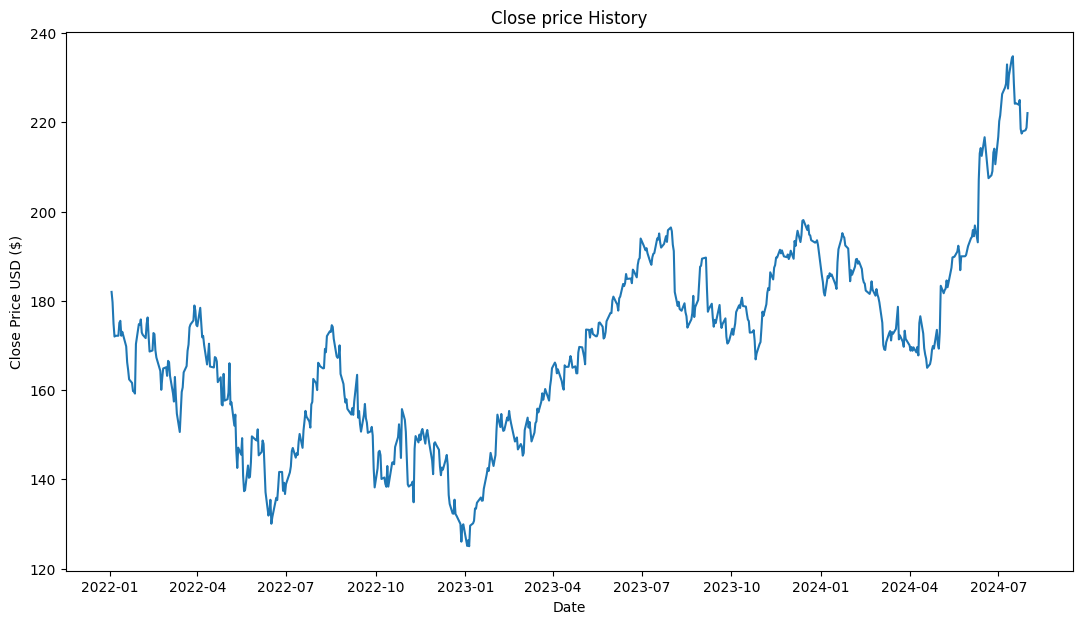

In [ ]:
stock_display(data)

In [ ]:
stock_candlestick_display(data)

In [ ]:
data['Predictions'] = data[['Close']].shift(-params.future_days)

**Scale & split**

In [ ]:
X = data.drop(columns=['Predictions'])[:-params.future_days]
y = data.filter(['Predictions'])[:-params.future_days]
if params.scale_y == True:
  y = scale_data(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= params.test_size)

**Model**

In [ ]:
# model = RandomForestRegressor(n_estimators=1000, max_features='sqrt', oob_score=True,n_jobs=4)
# model = RandomForestRegressor()
model = tree.DecisionTreeRegressor()

**Train model**

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
print(data.head())
x_future = data.drop(['Predictions'], axis=1)[:-params.future_days]
x_future = x_future.tail(params.future_days)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.481110   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.203201   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.489624   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.610199   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.777832   

               Volume  Predictions  
Date                                
2022-01-03  104487900   142.559998  
2022-01-04   99310400   147.110001  
2022-01-05   94537600   145.539993  
2022-01-06   96904000   149.240005  
2022-01-07   86709100   140.820007  


In [ ]:
predictions = model.predict(x_future)

**Test**

In [ ]:
# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
valid = data[X.shape[0]:]
valid['Predictions'] = predictions

# oob_error = 1 - model.oob_score_
# print(f'Out of Bag estimate of the error:{oob_error*100:2.2f} %')

# Visualization
# InputFeatures = [feature for feature in x_train.columns if  feature != 'Predictions']
# FeaImp=pd.DataFrame(data =model.feature_importances_,index =  InputFeatures,columns = ['Imp'])
# FeaImp.sort_values(by = ['Imp'],inplace = True)
# ax = FeaImp.plot.barh()

y_hat = model.predict(X)

r2 = r2_score(y, y_hat)
print("R² score (train)  %0.1f%% " % ( r2 * 100))
print("RMSE score (test)  %0.1f%% " % (np.sqrt(sklearn.metrics.mean_squared_error(y, y_hat))))

# accuracy = model.score(y_hat, y_test)
# print(accuracy)

R² score (train)  68.1% 
RMSE score (test)  17.4% 


<ipython-input-40-8943cb31bd61>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Visualization**

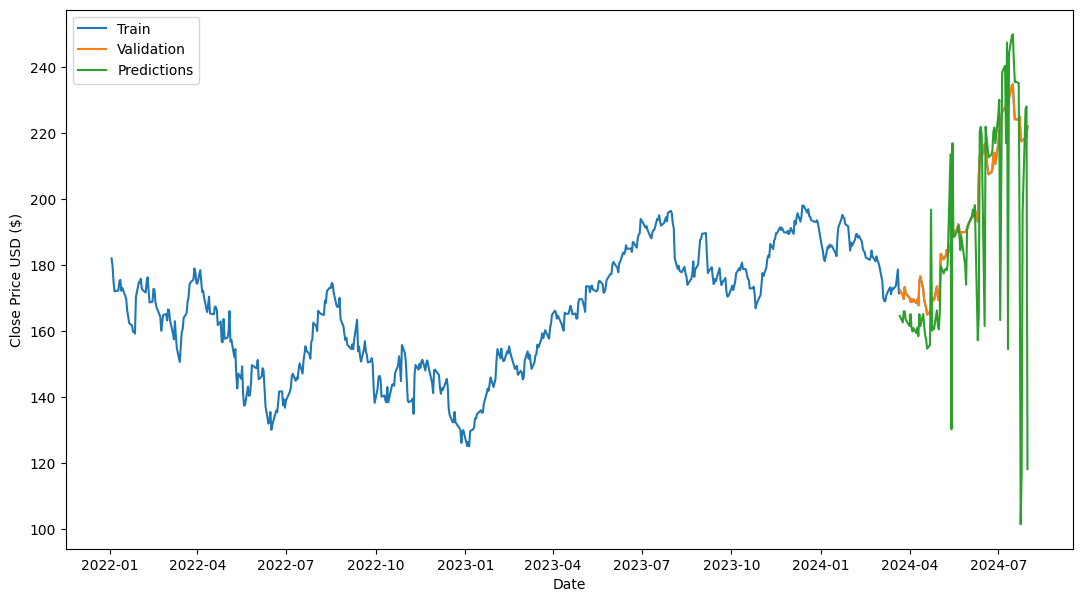

In [ ]:
display_predictions(data, valid)